# Привет, коллега!

В течение четырех занятий нас ждет полное погружение, которое включает в себя:
1. Получение данных
2. Предобработка данных
3. Раздовательный анализ данных
4. Проверка гипотез
5. Формулирование выводов, рекомендаций и плана возможных действий для мнеджмента компании

#### Данные для задания можно скачать по ссылке: https://drive.google.com/file/d/1pCBXkKTE-Dqf2saOAwCIke08vcG6_voY/view?usp=sharing
#### Для выполнения задания тебе могут пригодится библиотеки:
(some **hint** 
1. import pandas as pd
2. import numpy as np 
3. import datetime
3. import sklearn )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Step_1_Uzum_Academy.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3000 non-null   int64  
 1   id                     3000 non-null   float64
 2   date_created           3000 non-null   object 
 3   order_id               2992 non-null   float64
 4   city_name              2992 non-null   object 
 5   date_assembly_started  2810 non-null   object 
 6   work_place_id          2956 non-null   float64
 7   date_picked            2610 non-null   object 
 8   single_item            3000 non-null   bool   
 9   from_multi_stock_wave  3000 non-null   bool   
 10  dp_id                  2994 non-null   float64
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 216.9+ KB


Описание колонок в дата-фрейме:

1) id - уникальный ID записи
2) date_created - дата и время создания заказа
3) order_id - уникальный ID заказа
4) city_name - город заказа
5) date_assembly_started - дата и время начала сборки заказа
6) work_place_id - id места работника, который работает с заказом
7) date_picked - дата и время окончания отбора позиций заказа
8) single_item (булевое значение) - находится ли в заказе 1 товар в количестве 1 штука
9) from_multi_stock_wave (булевое значение) - собирается ли заказ с нескольких складов

Задача №1. Коллега прислал тебе данные для анализа: скачай данные, проверь количество колонок. Если присутствуют лишняя колонка (колонки) - их нужно удалить.

In [2]:
# ...some code here ....
df = df.drop(['Unnamed: 0','dp_id'],axis = 1)

In [3]:
df.columns

Index(['id', 'date_created', 'order_id', 'city_name', 'date_assembly_started',
       'work_place_id', 'date_picked', 'single_item', 'from_multi_stock_wave'],
      dtype='object')

Задача №2. Теперь необходимо проверить кол-во строк и кол-во непустых строк в дата-фрейме. Если в дата-фрейме в какой-либо колонке присутствуют пустые значения - можно удалить целую строку. 

In [4]:
df.dropna(inplace=True)
# ...some code here ....

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2455 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2455 non-null   float64
 1   date_created           2455 non-null   object 
 2   order_id               2455 non-null   float64
 3   city_name              2455 non-null   object 
 4   date_assembly_started  2455 non-null   object 
 5   work_place_id          2455 non-null   float64
 6   date_picked            2455 non-null   object 
 7   single_item            2455 non-null   bool   
 8   from_multi_stock_wave  2455 non-null   bool   
dtypes: bool(2), float64(3), object(4)
memory usage: 158.2+ KB


Задача №3. 
Теперь, когда все готово, приступим к главному:
    Твой коллега скинул данные для того, чтобы ты, как аналитик, подсчитал, для какого города заказы собираются быстрее. 
    Таким образом:
    
1) Нужно сравнить date_created и date_assembly_started - сколько времени проходит от создания заказа до начала его сборки в среднем?
2) Нужно сравнить - сколько времени проходит от начала сборки до окончания отбора позиций в среднем?
3) Затем сравнить 2 полученные выше метрики по городам (для какого города время от создания заказа до начала сборки - минимальное? для какого города - максимальное? как бы ты объяснил - почему?)


In [6]:
# ... some code here ... 
df.head()

,id,date_created,order_id,city_name,date_assembly_started,work_place_id,date_picked,single_item,from_multi_stock_wave
0,131199.099109,2023-10-03 14:15:30.183690,154445.148978,"{""ru"": ""Бухара"", ""uz"": ""Buxoro""} Kuryerlik xiz...",2023-10-03 16:17:51.777480,123.0,2023-10-03 15:51:56.474616,False,False
1,65635.223942,2023-07-02 13:34:55.760787,77009.786410,"{""ru"": ""Ташкент"", ""uz"": ""Toshkent""} ТАШ-25",2023-07-02 15:38:54.143670,107.0,2023-07-02 15:03:36.372913,False,False
2,47216.631063,2023-05-30 12:55:31.324566,54323.211592,"{""ru"": ""Ташкент"", ""uz"": ""Toshkent""} ТАШ-41",2023-05-30 21:50:25.977527,109.0,2023-05-30 21:01:33.655621,False,False
3,66496.840504,2023-07-04 05:54:32.376455,78124.970832,"{""ru"": ""Шахрисабз"", ""uz"": ""Shahrisabz""} ШРЗ-1",2023-07-04 08:58:07.509438,128.0,2023-07-04 07:39:54.982416,False,False
4,3988.887114,2022-12-20 13:30:12.592720,3440.817729,"{""ru"": ""Маргилан"", ""uz"": ""Marg‘ilon""} МРГ-1",2022-12-20 15:25:54.385155,101.0,2022-12-20 14:08:37.492925,False,False


для начала надо раздробить колонку city_name на:
- city_name_ru
- city_name_uz
- place

In [7]:
df[['map','place']] = df['city_name'].apply(lambda x: pd.Series(str(x).split("} ")))
df['map'] = df['map'].apply(lambda x: x + '}')

In [8]:
import json

# преобразуем в обьект python
def try_parse_json(x):
    try:
        return json.loads(x)
    except json.JSONDecodeError:
        return {}

df['map'] = df['map'].apply(try_parse_json)

In [9]:
# вытаскиваем значения из словаря
df['city_name_ru'] = df['map'].apply(lambda x: x.get('ru', ''))
df['city_name_uz'] = df['map'].apply(lambda x: x.get('uz', ''))

# удаляем лишнее
df = df.drop(['map','city_name'],axis = 1)
df.dropna(inplace=True)

заметил ошибку в временных колонках, время в колонках должны быть в такой очередности:
1. date_created
2. date_assembly_started 
3. date_picked

но идут в такой очередности:
1. date_created
2. date_picked
3. date_assembly_started

Исправляем

In [10]:
# переименовываем
df.rename(columns={"date_assembly_started": "date_picked",
                   "date_picked": "date_assembly_started"})

# меняем местами в таблице(для удобства)
df['date_assembly_started'], df['date_picked'] = df['date_picked'] , df['date_assembly_started']

In [11]:
# избавляемся от наносекунд и преобразовывем к временному типу данных
df['date_assembly_started'] = pd.to_datetime(df['date_assembly_started']).astype('datetime64[s]')
df['date_picked'] =           pd.to_datetime(df['date_picked']).astype('datetime64[s]')
df['date_created'] =          pd.to_datetime(df['date_created']).astype('datetime64[s]')

#### среднее время от создания до начала сборки заказа

In [12]:
df['assembly_start_delay'] = df['date_assembly_started'] - df['date_created']
print(df['assembly_start_delay'].mean())

0 days 04:20:46.597131046


#### среднее время от начала сборки до окончания отбора позиции

In [13]:
df['assembly_duration'] =  df['date_picked'] - df['date_assembly_started']
print(df['assembly_duration'].mean())

0 days 00:58:31.347351614


In [14]:
df.head()

,id,date_created,order_id,date_assembly_started,work_place_id,date_picked,single_item,from_multi_stock_wave,place,city_name_ru,city_name_uz,assembly_start_delay,assembly_duration
0,131199.099109,2023-10-03 14:15:30.183690,154445.148978,2023-10-03 15:51:56.474616,123.0,2023-10-03 16:17:51.777480,False,False,Kuryerlik xizmati,Бухара,Buxoro,0 days 01:36:26.290926,0 days 00:25:55.302864
1,65635.223942,2023-07-02 13:34:55.760787,77009.786410,2023-07-02 15:03:36.372913,107.0,2023-07-02 15:38:54.143670,False,False,ТАШ-25,Ташкент,Toshkent,0 days 01:28:40.612126,0 days 00:35:17.770757
2,47216.631063,2023-05-30 12:55:31.324566,54323.211592,2023-05-30 21:01:33.655621,109.0,2023-05-30 21:50:25.977527,False,False,ТАШ-41,Ташкент,Toshkent,0 days 08:06:02.331055,0 days 00:48:52.321906
3,66496.840504,2023-07-04 05:54:32.376455,78124.970832,2023-07-04 07:39:54.982416,128.0,2023-07-04 08:58:07.509438,False,False,ШРЗ-1,Шахрисабз,Shahrisabz,0 days 01:45:22.605961,0 days 01:18:12.527022
4,3988.887114,2022-12-20 13:30:12.592720,3440.817729,2022-12-20 14:08:37.492925,101.0,2022-12-20 15:25:54.385155,False,False,МРГ-1,Маргилан,Marg‘ilon,0 days 00:38:24.900205,0 days 01:17:16.892230


посмотрим на остальные признаки, могут ли они влиять на время

In [158]:
df['single_item'].value_counts()

single_item
False    2447
True        5
Name: count, dtype: int64

In [15]:
df['from_multi_stock_wave'].value_counts()

False    2452
Name: from_multi_stock_wave, dtype: int64

не могут. везде одинаковые значения

#### построим таблицу средних, для каждого города и укажем количество заказов(выберем 20 городов с наибольшими заказами)

In [16]:
#Время на один заказ по каждому городу
# Сравнить это время
#Индекс аффинитивности - это когда мы берем конкретное значение какого-то признака для конкретного наблюдения и делим, например, на среднее по всей генеральной совокупности.


result = (df.groupby('city_name_ru').agg({'assembly_start_delay': 'mean', 
                                          'assembly_duration': 'mean',
                                          'order_id': 'count'})
                                    .reset_index()
                                    .sort_values(by='order_id')
                                    .nlargest(20,columns=['order_id'])).rename(columns={'order_id':'count_order_id'})

result.sort_values(by='assembly_start_delay',ascending=False)

,city_name_ru,assembly_start_delay,assembly_duration,count_order_id
50,Ургенч,0 days 06:46:30.304310200,0 days 00:53:43.067177983,60
42,Нукус,0 days 06:42:10.686629584,0 days 00:51:22.199162094,53
47,Ташкент,0 days 05:36:13.825583064,0 days 00:59:41.008203697,1076
2,Алмалык,0 days 04:36:35.536927229,0 days 01:12:43.533277187,48
33,Коканд,0 days 03:42:49.716167642,0 days 00:50:45.188901380,42
58,Чирчик,0 days 03:28:47.970914142,0 days 01:13:36.339495542,35
4,Андижан,0 days 03:26:28.230001048,0 days 00:55:02.391742072,83
41,Наманган,0 days 03:22:57.208844542,0 days 01:01:09.478550442,70
39,Навои,0 days 03:16:22.703309839,0 days 00:53:38.399079296,81
14,Гулистан,0 days 03:13:16.214214290,0 days 00:58:02.947595387,31


- 'assembly_start_delay' и assembly_duration не коррелируют между собой(визуально)
- существенные различия наблюдатся в assembly_start_delay, 
- а в assembly_duration среднее время сбора 1 час +-10 минут

Посмотрим на 3 города которые долго собирают заказ. Видим что есть существенные временные различия в точках сбора заказа

- **В Нукусе разница от часа до 8ми часов. очень большая разница** 
- **В Ургенч все большие значение, слабое звено это курьер**

In [35]:
#Тест - как сравнить средние при ненормальном распределении:
# 1) Манна-Уитни тест
# 2) Постараться привести к нормальному распределению:
# 2. Приветси численный признак к логнормальному распределению
# 3. Очистить выбросы = > посмотреть еще раз

pd.pivot_table(df[df['city_name_ru'].isin(['Нукус', 'Ургенч'])],
                              index=['city_name_ru', 'place'],
                              values=['assembly_start_delay', 'order_id'],  # Включаем столбец 'id'
                              aggfunc={'assembly_start_delay': 'mean', 'order_id': 'count'}).rename(columns={'order_id':'count_order_id'}).sort_values(by='city_name_ru')

assembly_start_delay  count_order_id
city_name_ru place                                            
Нукус        Courier    0 days 04:23:21.912044               1
             НУК-1   0 days 06:25:52.433402960              25
             НУК-2   0 days 06:50:29.991997277              18
             НУК-3   0 days 08:14:38.754373625               8
             НУК-4      0 days 00:59:03.753310               1
Ургенч       Courier    0 days 09:41:45.937502               1
             УРГ-1   0 days 07:23:30.988450904              21
             УРГ-2   0 days 07:26:23.382058666              18
             УРГ-3   0 days 04:27:01.507156100              10
             УРГ-4   0 days 06:15:22.684836666               3
             УРГ-5   0 days 06:20:28.222930571               7

**тут особенно видим что между самым быстрым и самым долгим пунтком разница во времени равна 14 часов**

In [17]:
pd.pivot_table(df[df['city_name_ru'] == 'Ташкент'],
                              index=['city_name_ru', 'place'],
                              values=['assembly_start_delay', 'order_id'],  # Включаем столбец 'id'
                              aggfunc={'assembly_start_delay': 'mean', 'order_id': 'count'}).rename(columns={'order_id':'count_order_id'}).sort_values(by='assembly_start_delay')

assembly_start_delay  count_order_id
city_name_ru place                                            
Ташкент      ТАШ-85     0 days 00:55:43.484976               1
             ТАШ-60     0 days 00:59:30.964738               1
             ТАШ-100 0 days 01:04:52.852961500               2
             ТАШ-97     0 days 02:18:15.871526               1
             ТАШ-56  0 days 03:14:20.336962333               3
...                                        ...             ...
             ТАШ-96     0 days 11:27:07.526542               2
             ТАШ-90  0 days 11:33:20.289652666               3
             ТАШ-82     0 days 12:31:52.826327               1
             ТАШ-105    0 days 12:36:56.838661               1
             ТАШ-93  0 days 14:53:43.292287600               5

[103 rows x 2 columns]

Задача №4. Ты подсчитал среднее время сборки заказа по городам и в целом, однако теперь хочется понять являются ли результаты значимыми. 

1) Проверь распредение сборки заказов в целом (без разделения по городам) - является ли распределение нормальным?
2) Проверь распредение сборки заказов для самого медленного города и для самого быстрого. Являются ли оба эти распределения нормальным?
3) Построй графики плотности распределений и box-plots. Что говорят данные? Как бы ты их интерпретировал? 
5) Проведи 2 статистических теста для проверки нормальности (на выбор) по два теста - на каждый город. О чем говорят метрики? О чем говорит p.value? 
6) Сравни 2 города (самый быстрый и самый медленный), используя параметрический или непараметрический критерий сравнения (в зависимости от пункта 5). 
7) Сделай вывод, относительно результата. 



In [163]:
# ...some code here ...

- Общий график растет по экспоненте, как и Ташкент. Хорошо коррелируют два графика, так как в Ташкенте самое большое количество заказов
- Ургенч(slow) в сентябре месяце после пика резко сократился сбор заказов.рост восстановился в октябре,количество сбора заказов только увеличивается
- Шахризабс(fast) резкий рост сборки заказов в июле, затем медленный спад.

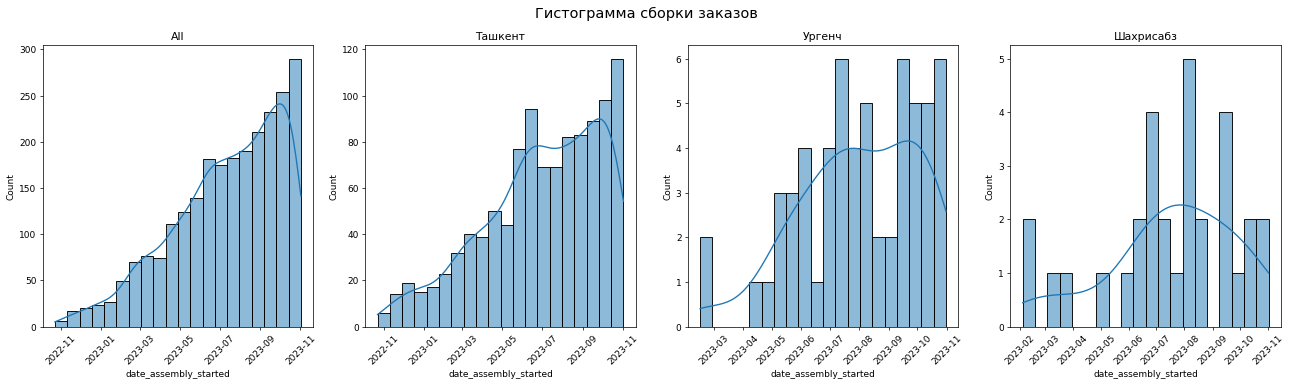

In [36]:
# Выберите только интересующие вас города
cities = ['All','Ташкент', 'Ургенч', 'Шахрисабз']

# Создайте 4 отдельных гистограммных графика
plt.figure(figsize=(20, 6), dpi=65)
plt.suptitle('Гистограмма сборки заказов', fontsize=16)

for i, city in enumerate(cities, start=1):
    plt.subplot(1, 4, i)
    if city == 'All':
        data = df['date_assembly_started']
    else:
        data = df[df['city_name_ru'] == city]['date_assembly_started']
        
# Добавьте проверку на наличие данных
    if not data.empty:
        sns.histplot(data, bins=20, kde=True)
        plt.title(city)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#1. Объяснить графики плтности распределений без Ташкента и взять ташкент отдельно
#2. Построить тренд: тангенс угла наклона прямой в положительном направлении оси OX
#3. Постараться объединить города на основе какого-либо признака (признаков)
#4. Распределить города по произвольному кол-ву признаку. Почитать RFM-анализа (аналог)
#5. Распределить города по произвольному кол-ву признаков с помощью кластерного анализа (k-means)

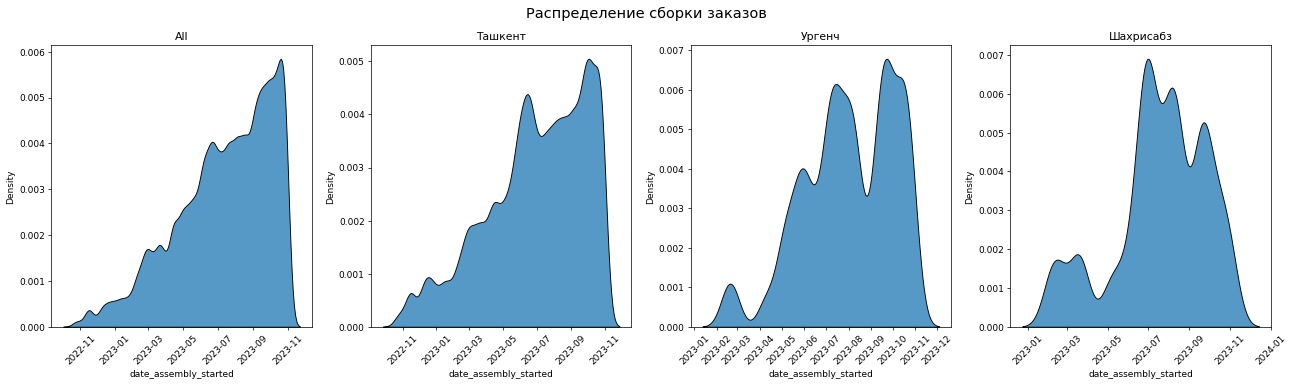

In [165]:
# Города, для которых вы хотите построить графики
cities = ['All','Ташкент', 'Ургенч', 'Шахрисабз']

plt.figure(figsize=(20, 6), dpi=65)
plt.suptitle('Распределение сборки заказов', fontsize=16)

for i, city in enumerate(cities, start=1):
    plt.subplot(1, 4, i)
    if city == 'All':
        data = df['date_assembly_started']
    else:
        data = df[df['city_name_ru'] == city]['date_assembly_started']
    
    # Добавьте проверку на наличие данных
    if not data.empty:
        sns.kdeplot(data, bw_adjust=0.4, multiple="stack")
        plt.title(city)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


- Начало отсчета началось в ноябре 2022 года(Ташкент), но в городах (slow) и (fast) только с марта 2023
- Общая медиана июль, в slow и fast август(позже старт позже медиана)
- большинство сборов заказов приходится на июнь-сентябрь
- Верхие усы короче, это говорит что за 2 последних месяца заказов столько же сколько 5-6 месяцев было со старта

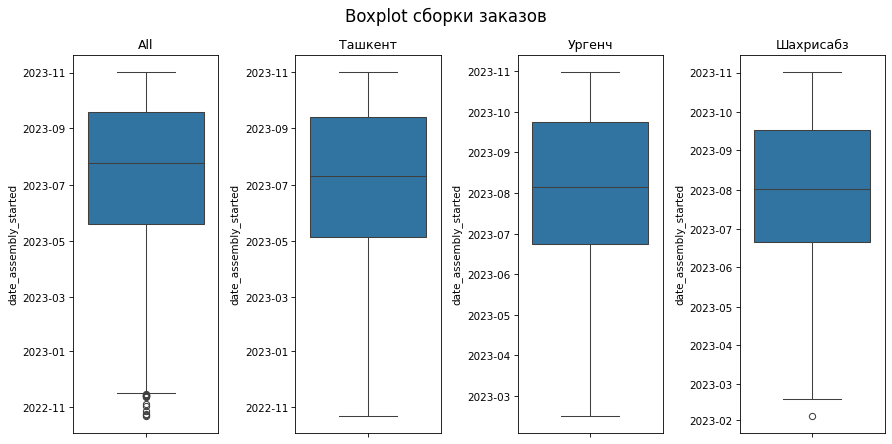

In [166]:
# Ургенч(slow), Шахрисабз(fast)
cities = ['All','Ташкент', 'Ургенч', 'Шахрисабз']

plt.figure(figsize=(12, 6), dpi=75)
plt.suptitle('Boxplot сборки заказов', fontsize=16)

for i, city in enumerate(cities, start=1):
    plt.subplot(1, 4, i)
    
    if city == 'All':
        data = df['date_assembly_started']
    else:
        data = df[df['city_name_ru'] == city]['date_assembly_started']
    
    # проверка на наличие данных
    if not data.empty:
        sns.boxplot(data=data)
        plt.title(city)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#1. Постараться подумать, как сравнивать средние: какие методы есть, какие ограничения, что конкретно сравнивается. 
#2. Таким образмом пайплайн для сравнения средних:
# 1. Проверить распределения
# 2. Обосновать выбор статистического критерия (т-тест / манна-уитни / другой (можно посмотреть про бустрэп))
# 3. Прочитать / понять, как простыми словами можно интерпретировать статистику теста? Как интерпретировать p.value, как интерпретировать конечный результат
# 4. Почитать о механике теста.
# 5. ЦПТ - почитать и понимать основной смысл. = > я скину. 

,id,date_created,order_id,date_assembly_started,work_place_id,date_picked,single_item,from_multi_stock_wave,place,city_name_ru,city_name_uz,assembly_start_delay,assembly_duration,assembly_start_delay_seconds
1,65635.223942,2023-07-02 13:34:55.760787,77009.786410,2023-07-02 15:03:36.372913,107.0,2023-07-02 15:38:54.143670,False,False,ТАШ-25,Ташкент,Toshkent,0 days 01:28:40.612126,0 days 00:35:17.770757,5320.612126
2,47216.631063,2023-05-30 12:55:31.324566,54323.211592,2023-05-30 21:01:33.655621,109.0,2023-05-30 21:50:25.977527,False,False,ТАШ-41,Ташкент,Toshkent,0 days 08:06:02.331055,0 days 00:48:52.321906,29162.331055
6,61060.664954,2023-06-24 16:19:59.699151,71346.764845,2023-06-24 21:52:12.089195,126.0,2023-06-24 22:40:04.436945,False,False,ТАШ-50,Ташкент,Toshkent,0 days 05:32:12.390044,0 days 00:47:52.347750,19932.390044
9,133571.332707,2023-10-05 23:50:27.311313,157130.513355,2023-10-06 06:04:49.521020,129.0,2023-10-06 06:53:01.076230,False,False,ТАШ-71,Ташкент,Toshkent,0 days 06:14:22.209707,0 days 00:48:11.555210,22462.209707
13,28268.525636,2023-04-20 07:30:34.261759,34792.276656,2023-04-21 03:08:16.037036,111.0,2023-04-21 05:08:38.570499,False,False,ТАШ-1,Ташкент,Toshkent,0 days 19:37:41.775277,0 days 02:00:22.533463,70661.775277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,118875.494747,2023-09-18 19:42:06.231397,140594.706189,2023-09-19 04:28:21.881592,123.0,2023-09-19 04:30:05.471593,False,False,ТАШ-5,Ташкент,Toshkent,0 days 08:46:15.650195,0 days 00:01:43.590001,31575.650195
2988,90554.394424,2023-08-11 08:33:12.359347,107791.577603,2023-08-11 10:17:13.952498,106.0,2023-08-11 11:21:18.915332,False,False,ТАШ-38,Ташкент,Toshkent,0 days 01:44:01.593151,0 days 01:04:04.962834,6241.593151
2993,16449.938798,2023-03-11 18:12:04.818765,19901.365607,2023-03-11 20:39:46.082380,107.0,2023-03-11 21:43:51.599289,False,False,ТАШ-15,Ташкент,Toshkent,0 days 02:27:41.263615,0 days 01:04:05.516909,8861.263615
2994,26723.727812,2023-04-16 13:26:18.811407,32873.010918,2023-04-16 23:51:19.898190,109.0,2023-04-17 00:28:07.789692,False,False,ТАШ-24,Ташкент,Toshkent,0 days 10:25:01.086783,0 days 00:36:47.891502,37501.086783


In [21]:
from scipy.stats import anderson,shapiro

# у меня выдавало ошибку типа данных при тесте используя assembly_start_delay(timedelta64[s]) - диапазон
# поэтому я преобразовал
df['assembly_start_delay_seconds'] = df['assembly_start_delay'].dt.total_seconds()

data_urgench = df[df['city_name_ru'] == 'Ургенч']['assembly_start_delay_seconds']
data_shahrisabz = df[df['city_name_ru'] == 'Шахрисабз']['assembly_start_delay_seconds']

# тест Андерсона-Дарлинга
result_urgench = anderson(data_urgench)
print(f"Тест Андерсона-Дарлинга для Ургенч: statistic = {result_urgench.statistic}, критические значения = {result_urgench.critical_values}, уровень значимости = {result_urgench.significance_level}")

result_shahrisabz = anderson(data_shahrisabz)
print(f"Тест Андерсона-Дарлинга для Шахрисабз: statistic = {result_shahrisabz.statistic}, критические значения = {result_shahrisabz.critical_values}, уровень значимости = {result_shahrisabz.significance_level}")

# тест Шапиро-Уилка
stat_urgench, p_urgench = shapiro(data_urgench)
print(f"Тест Шапиро-Уилка для Ургенч: statistic = {stat_urgench}, p-value = {p_urgench}")

stat_shahrisabz, p_shahrisabz = shapiro(data_shahrisabz)
print(f"Тест Шапиро-Уилка для Шахрисабз: statistic = {stat_shahrisabz}, p-value = {p_shahrisabz}")

Тест Андерсона-Дарлинга для Ургенч: statistic = 2.390586632943638, критические значения = [0.544 0.619 0.743 0.866 1.03 ], уровень значимости = [15.  10.   5.   2.5  1. ]
Тест Андерсона-Дарлинга для Шахрисабз: statistic = 1.308864335838365, критические значения = [0.522 0.595 0.713 0.832 0.99 ], уровень значимости = [15.  10.   5.   2.5  1. ]
Тест Шапиро-Уилка для Ургенч: statistic = 0.881089448928833, p-value = 2.8789198040612973e-05
Тест Шапиро-Уилка для Шахрисабз: statistic = 0.874946653842926, p-value = 0.0018074782565236092


Statistic (статистика) равна 2.39 и 1.3. Сравнивая с критическими значениями, stat превышает их, данные не являются нормально распределенными
Маленькое p-value указывает на то, что данные не соответствуют нормальному распределению

In [22]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(data_urgench, data_shahrisabz)

if p_value < 0.05:
    print(f"Существует статистически значимая разница. p-value = {p_value}")
else:
    print("Статистически значимой разницы не выявлено.")

Существует статистически значимая разница. p-value = 1.0794660345713212e-05


- **Существует статистически значимая разница во времени сборки заказов между городами Ургенч и Шахрисабз.**
- **Город Ургенч имеет более длительное время сборки заказов по сравнению с Шахрисабз.**

Задача №5. Полученные результаты ты показал коллеге. Он поблагодарил тебя за работу, посмотрел результаты, но вдруг ему в голову пришла гипотеза - а что если на время сборки заказа влияет кол-во заказов на складе в этот день? И действительно! Вероятно, что чем больше заказов было создано в конкретный день, тем медленнее их будут собирать. Ты вызвался проверить эту гипотезу.

Таким образом:

1) Сформируй дата-фрейм, где будет: кол-во заказов (можно брать count по order_id), дата (можно взять дату создания заказа) и среднее время сборки заказа в эту дату. 
2) Построй корреляцию между кол-вом заказов и среднем временем сборки в этот день
3) Построй линейную регрессию для этих же признаков, где зависимая переменная - среднее время сборки заказа. 
4) О чем говорят данные? Что говорят метрики корреляции? Что говорят статистики регрессии? Как бы ты поделился результатом с коллегой, который не очень хорош в математике? 

In [169]:
# ... some code here ... 

In [23]:
final_df = pd.pivot_table(df, index=df['date_assembly_started'].dt.date,
                   values=['order_id','assembly_start_delay_seconds'],
                   aggfunc={'order_id':'count','assembly_start_delay_seconds': 'mean'}).rename(columns={'order_id':'count_order_id'}).sort_values(by='assembly_start_delay_seconds').reset_index()

In [24]:
final_df['assembly_start_delay_seconds'] = final_df['assembly_start_delay_seconds'].round(0).astype('int32')
final_df['assembly_start_delay_hours'] = round(final_df['assembly_start_delay_seconds'] / 3600,2)
final_df = final_df.drop('assembly_start_delay_seconds',axis = 1)

In [172]:
# часы в десятичном формате
final_df

,date_assembly_started,count_order_id,assembly_start_delay_hours
0,2022-10-22,1,0.13
1,2023-01-03,1,0.21
2,2023-03-09,1,0.22
3,2023-01-31,1,0.32
4,2022-11-04,1,0.39
...,...,...,...
337,2023-05-13,8,12.57
338,2023-05-16,6,12.65
339,2022-11-13,4,14.53
340,2023-04-14,6,14.92


In [25]:
corr_value = final_df['assembly_start_delay_hours'].corr(final_df['count_order_id']).round(2)
print(f'Коэфициент корреляции: {corr_value}')

Коэфициент корреляции: 0.13


Коэффициент наклона (slope): 0.07064943729371127
Пересечение (intercept): 3.59560695835035


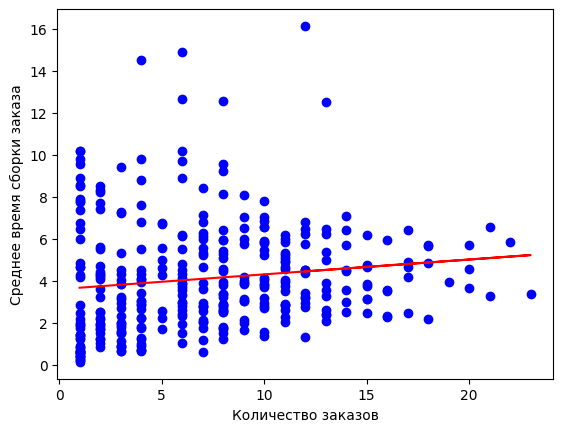

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Определение независимой и зависимой переменных
X = final_df[['count_order_id']]
y = final_df['assembly_start_delay_hours']

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Вывод коэффициентов регрессии
print(f"Коэффициент наклона (slope): {model.coef_[0]}")
print(f"Пересечение (intercept): {model.intercept_}")

# Построение графика регрессии
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Количество заказов')
plt.ylabel('Среднее время сборки заказа')
plt.show()

#1. После проверки на нормальность - нужно было постараться привести данные к нормальному распределению (почистить выбросы, к логнормальонму привести)
#2. Разделить на группу (например, просто убрать Ташкент и считать его отдельно)
#3. Постараться регрессию вышего порядка.
#4. R2 - почитать и посмотреть, что это такое. 

In [47]:
#1. Для всего, где выводится rank и список городов (по времени, по кол-ву заказов) - посчитать индекс аффинитивности относительно среднего
#2. Для подсчета средних статистик - необходимо их нормировать и считать среднее кол-во времени, например, в разрезе 1 заказа.
#3. Для всего где сравниваются средние, провести тест(ы) на нормальность и затем проверить соответствующим критерием (манна-уитни или т-тест)
#4. ЦПТ - скинуть материал. Также скинуть про p.value, критические значения (тестов).
#5. Для каждого города сформировать некоторое кол-во признаков для сегментации.
#6. Сгруппировать города по произвольному кол-ву признаков, полученных из пункта 5.
#7. Прочитать про RFM-анализ и k-means. - скину. 
#8. Завести гит

3.59560695835035

- Коэффициент корреляции равен 0.13: **есть минимальная связь, что при увелечении заказов растет время сборки. не стоит на этом акцентировать**
- Коэффициент наклона равен 0.07 * 60(минут) = 4.2 минуты: **то есть с увелечением количества заказа на 1, время сборки растет в среднем на 4 минуты**
- Пересечение равно 3.6 что составляет минимальное время сбора первого заказа: **в среднем уходит 3 с половиной часа, чтобы оформить первый заказ после паузы.**
- Так же точки разбросаны, нелинейно: **1 заказ может собираться от нескольких минут до 10 часов**

In [ ]:
# Ниже представлдены задачи для организации финального ноутбука
## 1. Для всех колонок и всех нужных группировок (по городам, по кол-ву заказов, по кол-ву сотрудников и тп) - представлены распределения и box-plots.
## 2. Для всех количественных признаков посчитаны выбросы и значения заменены средним:  (почитать об этом - тут: https://www.statology.org/remove-outliers-python/) 
## 3. Для всех городов, где мы что-то сравниваем, считаем индекс-аффинитивности: https://www.unisender.com/ru/glossary/chto-takoe-affiniti-indeks/#anchor-1
## 4. ЦПТ - более простого объяснения не нашел:https://cutt.ly/6wTcySD5
## 5. Признаки для сегментации - любые. Если не будет идей - можем оставить на потом, сделаем вместе с live кодингом
## 6. Сгруппировать города: код тут - https://www.datacamp.com/tutorial/k-means-clustering-python, почитать про k-means - тут: https://eldf.ru/top10ml/?utm_campaign=TOF&utm_medium=paid&utm_source=facebook&utm_term=text1&utm_content=img2&fbclid=IwAR2gPnD8FN8Mp2fSWc7PLrZEEQQj_ykAUvDkxt1lvFUyfygcmc1VFZnAkGA и тут: https://datascience.eu/ru/%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5/%D0%BA-%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B0-%D0%B2-%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC-%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD/ (мб где-то еще, но это - базовая информация)
## 7. RFM-анализ https://www.unisender.com/ru/blog/idei/rfm-analiz/

Главная задача на эту неделю - сформировать все, что получится из пунктов выше и прочитать, если будет. 
В субботу 11.11.2023 - мы будем заниматься лайвкодингом. Организуем все полученные знания в единый, понятный и логичный ноутбук. 